In [41]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
with open('results/planned/log/experiment1_trial00.log', 'r') as rf:
    lines = [line for line in rf.readlines() if "robot-pose" in line]
lines

['18.4166667461,[debug],turtlebot1,simulation,robot-pose,x=-19.02;y=17.99;yaw=-1.38\n',
 '18.4166667461,[debug],turtlebot1,simulation,robot-pose,x=-19.02;y=17.99;yaw=-1.38\n',
 '20.3833334446,[debug],turtlebot2,simulation,robot-pose,x=-32.89;y=33.97;yaw=-3.10\n',
 '20.3833334446,[debug],turtlebot2,simulation,robot-pose,x=-32.89;y=33.97;yaw=-3.10\n',
 '20.7333333492,[debug],turtlebot3,simulation,robot-pose,x=-11.46;y=17.82;yaw=-1.25\n',
 '20.7333333492,[debug],turtlebot3,simulation,robot-pose,x=-11.46;y=17.82;yaw=-1.25\n',
 '20.9833333492,[debug],turtlebot4,simulation,robot-pose,x=-20.97;y=17.22;yaw=-1.53\n',
 '20.9833333492,[debug],turtlebot4,simulation,robot-pose,x=-20.97;y=17.22;yaw=-1.53\n',
 '21.2000000477,[debug],turtlebot5,simulation,robot-pose,x=-40.39;y=25.23;yaw=0.34\n',
 '21.2000000477,[debug],turtlebot5,simulation,robot-pose,x=-40.39;y=25.23;yaw=0.34\n',
 '33.4166667461,[debug],turtlebot1,simulation,robot-pose,x=-19.01;y=17.99;yaw=-1.38\n',
 '33.4166667461,[debug],turtlebot1

In [3]:
lines = [line.split(',') for line in lines]
dic = {}
for log in lines:
    try:
        x = float(log[-1].split(';')[0].split('=')[1])
        y = float(log[-1].split(';')[1].split('=')[1])
        position = [x, y]
        turtlebot = log[2]
        dic[turtlebot].append(position)
    except KeyError:
        dic[turtlebot] = [position]
dic

{'turtlebot1': [[-19.02, 17.99],
  [-19.02, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99]],
 'turtlebot2': [[-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],

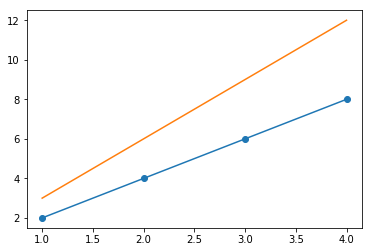

In [21]:
i = [2, 4, 6, 8]
j = [3, 6, 9, 12]
t = [1, 2, 3, 4]
plt.plot(t, i, 'o-')
plt.plot(t, j)

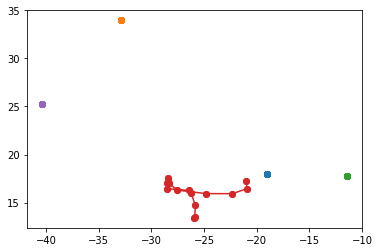

In [39]:
positions = list(dic.values())
for j in range(len(positions)):
    plt.plot([x[0] for x in positions[j][:28]], [x[1] for x in positions[j][:28]], 'o-')
#for i in range(len(positions[0])):
#    for j in range(len(positions)):
#        plt.plot()

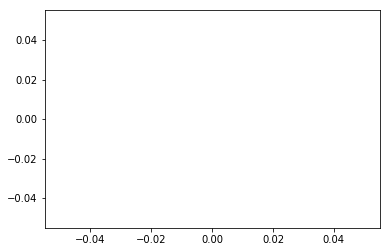

In [54]:
positions = list(dic.values())
robots = list(dic.keys())
colors = {'turtlebot1': 'r',
         'turtlebot2': 'b',
         'turtlebot3': 'g',
         'turtlebot4': 'm',
         'turtlebot5': 'c'}

def animate(i):
    for j in range(len(positions)):
        ax.plot([x[0] for x in positions[j][:i]], [x[1] for x in positions[j][:i]], 
                f'{colors[robots[j]]}o-')

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, frames=29)

In [55]:
ani.save('animations/0.mp4', fps=2)